In [11]:
import numpy as np

# Aufgabe 2

In [12]:
# Init (3x1) Vectors (use double '[]')
x = np.array([[1, -2, 3]]).T
y = np.array([[3, 2, 1]]).T

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

tensorproduct = x*y.T
print(f"Tensor product of x and y: \n {tensorproduct}")

det = np.linalg.det(tensorproduct)
print(f"Determinate of the tensorproduct:\n {det}")

Shape of x: (3, 1)
Shape of y: (3, 1)
Tensor product of x and y: 
 [[ 3  2  1]
 [-6 -4 -2]
 [ 9  6  3]]
Determinate of the tensorproduct:
 0.0


# Aufgabe 3

Let $A \in \mathbb{R}^{(p\times p)}$, i.e. a quadratic matrix. **Eigenvectors** $a$ of the Matrix $A$ are vectors, which do not change their direction through the multiplication with $A$ (but generally in their length). Thus matrix $A$ acts as a scalar. That scalar is the corresponding **Eigenvalues** denoted as $\lambda$.
We can compute the Eigenvalues by solving the following equation: $$ det(A-\lambda I)=0 $$.

To each Eigenvalue $\lambda_i$ exists one Eigenvector $a_i$. We can compute the Eigenvector $a_i$ through: $$(A-\lambda_i I)a_i = 0. $$

In [13]:
A = np.array([[1, 2], [2, 1]])

# Spur / Trace Berechnen
print(f"a) trace(A) = {A.trace()}")

# Determinate berechnen
print(f"b) det(A) = {round(np.linalg.det(A), 0)}")

# Eigenwerte und Eigenvektoren berechnen
eigenvalues, eigenvectors = np.linalg.eig(A) # Returns Eigenvalues and Eigenvectors
print(f"Eigenwerte von A: {eigenvalues}")
# Print Eigenvectors
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvektor von A zu Eigenwert {eigenvalue:.2f}: {eigenvectors[:, i]}")

# Zu c): Ja es gilt det(A) = lambda_1 * lambda_2 und spur(A) = lambda_1 + lambda_2
print("Zu c): Ja es gilt det(A) = lambda_1 * lambda_2 und spur(A) = lambda_1 + lambda_2")
print(80 * "_")

# Compute Inverse of A and round to 4 decimal places
A_inverse = np.around(np.linalg.inv(A), 4)
print(f"Inverse of A = \n{A_inverse}")
A_inverse_eigenvalues, A_inverse_eigenvectors = np.linalg.eig(A_inverse)
print(f"Eigenvalues of A_Inverse: {A_inverse_eigenvalues}")

a) trace(A) = 2
b) det(A) = -3.0
Eigenwerte von A: [ 3. -1.]
Eigenvektor von A zu Eigenwert 3.00: [0.70710678 0.70710678]
Eigenvektor von A zu Eigenwert -1.00: [-0.70710678  0.70710678]
Zu c): Ja es gilt det(A) = lambda_1 * lambda_2 und spur(A) = lambda_1 + lambda_2
________________________________________________________________________________
Inverse of A = 
[[-0.3333  0.6667]
 [ 0.6667 -0.3333]]
Eigenvalues of A_Inverse: [ 0.3334 -1.    ]


Ist $\lambda$ ein Eigenwert der invertierbaren Matrix $A$ zum Eigenvektor $x$, so ist ${\tfrac {1}{\lambda }}$ Eigenwert der inversen Matrix von $A$ zum Eigenvektor $x$.
[[Source](https://de.wikipedia.org/wiki/Eigenwertproblem)]

# Aufgabe 4

In [14]:
W = np.array([  [3, 1, 0], 
                [1, 3, 0], 
                [0, 0, 2.5]
            ])

X = np.array([  [round((1/np.sqrt(2)),5), round((1/np.sqrt(3)),5), round((1/np.sqrt(6)),5)],
                [round((1/np.sqrt(2)),5), round((-1/np.sqrt(3)),5), round((-1/np.sqrt(6)),5)],
                [0, round((1/np.sqrt(3)),5), round((-2/np.sqrt(6)),5)]
            ])
            
W_inverse = np.linalg.inv(W)
print(f"Inverse of W:\n {W_inverse}")
print(50 * "_")

res = X.dot(X.T)
res = np.around(res, 2)
print(f"XX' = \n{res}")
print("Matrix X is orthogonal, since XX' = I ")
print(50 * "_")

X_inverse = np.linalg.inv(X.T)
X_inverse = np.around(X_inverse, 2)
print(f"Inverse of X:\n {X_inverse}")
print(50 * "_")


Inverse of W:
 [[ 0.375 -0.125  0.   ]
 [-0.125  0.375  0.   ]
 [ 0.     0.     0.4  ]]
__________________________________________________
XX' = 
[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
Matrix X is orthogonal, since XX' = I 
__________________________________________________
Inverse of X:
 [[ 0.71  0.58  0.41]
 [ 0.71 -0.58 -0.41]
 [-0.    0.58 -0.82]]
__________________________________________________


# Aufgabe 5

In [15]:
# Init X with shape (n, p) = (4, 3)
X = np.array([  [-2, -1, 0],
                [2, 1, 0],
                [0, -1, 3],
                [4, 1, 1]
            ])

# Empirische Standardabweichungen der Variablen
sigma_1 = np.sqrt((20/3))
sigma_2 = np.sqrt((4/3))
sigma_3 = np.sqrt(2)

def compute_centering_matrix(n):
    """
    Computes and returns centering matrix C
    n:int Number of observations, i.e. rows
    """
    ## Get Identity Matrix with n = 4 (Einheitsmatrix)
    Identity = np.identity(n=n)

    ## Get ONE Matrix with shape n x n, i.e. 4x4
    ONES = np.ones(shape=(n, n))

    C = Identity - (1/n)*(ONES*ONES.T)
    return C

# Get centering matrix C
C = compute_centering_matrix(n=4)
print(f"Centering Matrix C_4 = \n{C}")

# Compute column wise centered matrix using C
X_centered = C.dot(X)

print(f"Column wise centered matrix X:\n {X_centered}")
print(50 * "_")
# ATTENTION: USE X.T TO COMPUTE CORRELATION BETWEEN COLUMNS AND NOT ROWS
print(f"Correlation Matrix of X: \n {np.corrcoef(X.T)}")

Centering Matrix C_4 = 
[[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]]
Column wise centered matrix X:
 [[-3. -1. -1.]
 [ 1.  1. -1.]
 [-1. -1.  2.]
 [ 3.  1.  0.]]
__________________________________________________
Correlation Matrix of X: 
 [[ 1.          0.89442719  0.        ]
 [ 0.89442719  1.         -0.40824829]
 [ 0.         -0.40824829  1.        ]]


## Aufgabe 5: Alternativ (Tutorium Ansatz)

$$ Z = (X-1_n\bar{X}')\cdot D^{-1} = (X - \frac{1}{n} 1 1' X) \cdot D^{-1} $$

In [16]:
# Task (a)
# Init X with shape (n, p) = (4, 3)
X = np.array([  [-2, -1, 0],
                [2, 1, 0],
                [0, -1, 3],
                [4, 1, 1]
            ])

# Empirische Standardabweichungen der Variablen
sigma_1 = np.sqrt((20/3))
sigma_2 = np.sqrt((4/3))
sigma_3 = np.sqrt(2)

D = np.array([  [sigma_1, 0, 0 ], 
                [0, sigma_2, 0],
                [0, 0, sigma_3]
            ])

n = 4
ONES_4 = np.ones((4,1))

Z = (X - ((1/n) * (ONES_4.dot(ONES_4.T)).dot(X))).dot(np.linalg.inv(D))
print(f"Standardized Matrix Z = \n{Z}")

# Task (b):
CORR_X = (1/(n-1)) * (Z.T).dot(Z)
print(f"Empirical Correlationmatrix of X = \n{CORR_X}")

Standardized Matrix Z = 
[[-1.161895   -0.8660254  -0.70710678]
 [ 0.38729833  0.8660254  -0.70710678]
 [-0.38729833 -0.8660254   1.41421356]
 [ 1.161895    0.8660254   0.        ]]
Empirical Correlationmatrix of X = 
[[ 1.00000000e+00  8.94427191e-01 -3.24765912e-18]
 [ 8.94427191e-01  1.00000000e+00 -4.08248290e-01]
 [-3.24765912e-18 -4.08248290e-01  1.00000000e+00]]


# LA Understanding (not relevant):

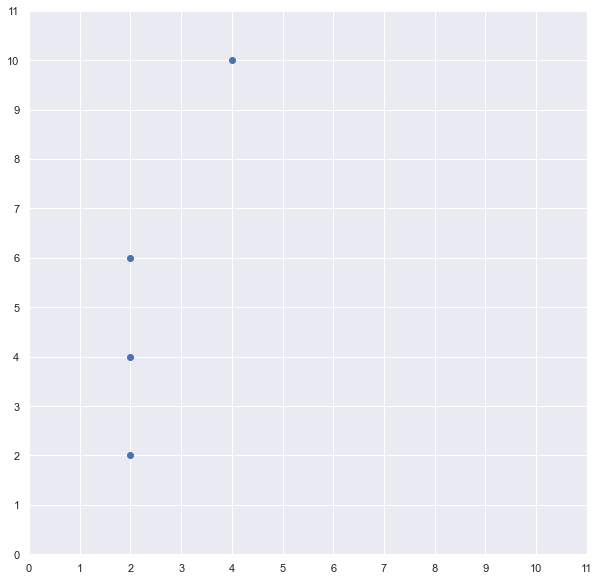

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x = [2, 2, 2, 4]
y = [2, 4, 6, 10]

plt.figure(figsize=(10, 10))
plt.scatter(x=x, y=y)
plt.xticks(np.arange(0, 12, 1))
plt.yticks(np.arange(0, 12, 1))
plt.show()